# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

Untaring file...


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)


In [7]:
len(X_train), len(X_valid), X_train[0].shape, y_train[0]

(35000, 15000, (32, 32, 3), 5)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 35000
Number of validation examples = 15000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [9]:
### Data exploration visualization code goes here.

# Visualizations will be shown in the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

signnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def getSignName(classid):
    return signnames[classid]

def plotSamples(imgs, labels, N, channel = -1):
    M = (n_classes + N - 1) // N
    plt.subplots(M, N, figsize=(N * 2, M * 2))
    i = 0
    for img, imgId in zip(imgs, labels):
        if imgId != i:
            continue;        

        i += 1
        plt.subplot(M, N, i)
        if channel < 0:
            plt.imshow(img)
        else:
            plt.imshow(img[:,:,channel], cmap='gray')
        title = "{}: {}".format(imgId, getSignName(imgId))
        if len(title) > 15:
            title = title[:12] + " ..."
        plt.title(title)
        plt.axis('off')
        
        if i == n_classes or i == M * N:
            break
            
    for i in range(M*N):
        plt.subplot(M, N, i + 1)
        plt.axis('off')

def plotRamdonSamples(imgs, labels, N, channel = -1):
    M = (n_classes + N - 1) // N
    plt.subplots(M, N, figsize=(N * 2, M * 2))

    for i in range(M * N):
        plt.subplot(M, N, i+1)
        if channel < 0:
            plt.imshow(imgs[i])
        else:
            plt.imshow(imgs[i][:,:,channel], cmap='gray')
        title = "{}: {}".format(y_train[i], getSignName(y_train[i]))
        if len(title) > 15:
            title = title[:12] + " ..."
        plt.title(title)
        plt.axis('off')
        
def plotCatalog(imgs, labels, classid, N):
    plt.subplots(1, N, figsize=(N, 1))
    plt.subplots_adjust(wspace=0, hspace=0)
    i = 0 
    for img, imgId in zip(imgs, labels):
        if imgId != classid:
            continue;        
        i += 1
        plt.subplot(1, N, i)
        plt.imshow(img)
        plt.axis('off')
        if (i>=N):
            break


In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Min number of images per class = 3500
Max number of images per class = 3500


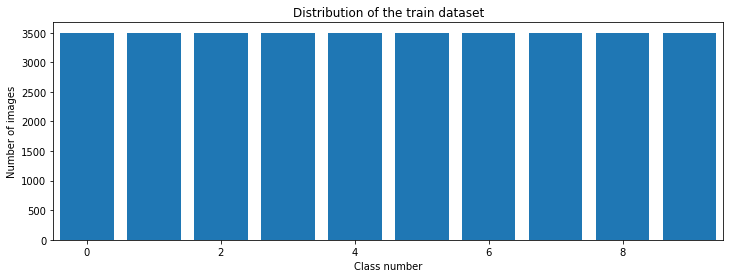

In [11]:
# Plot number of train images per class

num_of_samples = [0] * n_classes
for classid in y_train:
    if classid >= 0 and classid < n_classes:
        num_of_samples[classid] += 1

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.xlim(0 - 0.5, n_classes - 0.5)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
_ = plt.ylabel("Number of images")

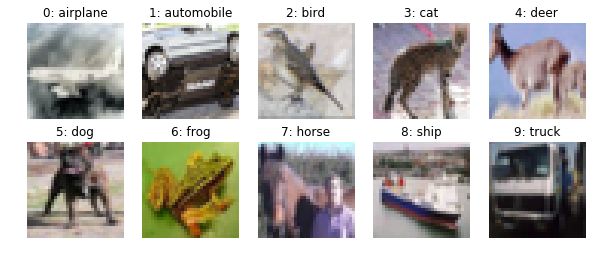

In [13]:
# show the first 36 samples of the shuffled training set
plotSamples(X_train, y_train, 5)

CLASS 0: airplane


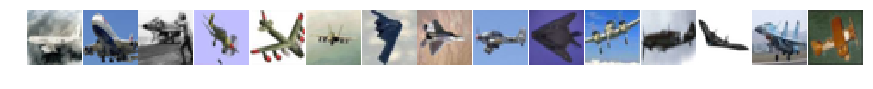

CLASS 1: automobile


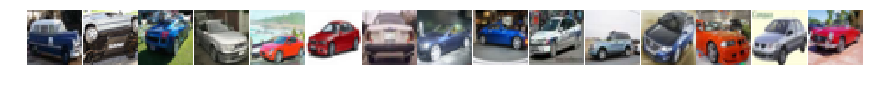

CLASS 2: bird


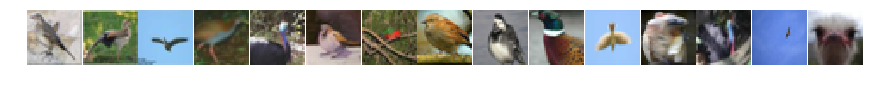

CLASS 3: cat


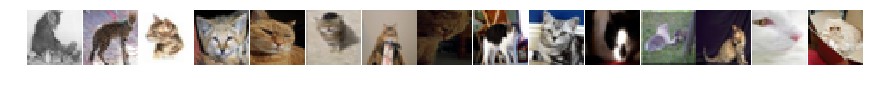

CLASS 4: deer


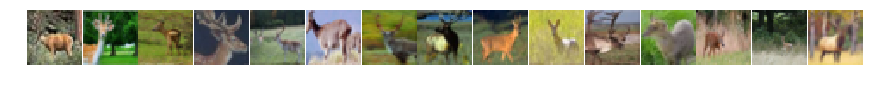

CLASS 5: dog


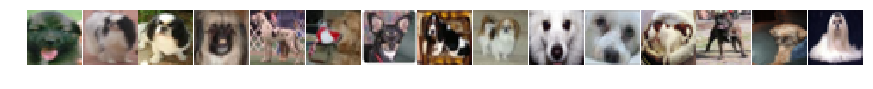

CLASS 6: frog


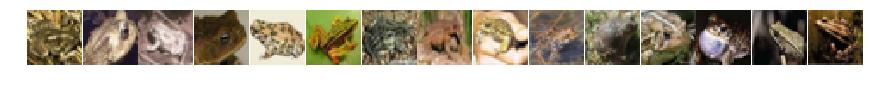

CLASS 7: horse


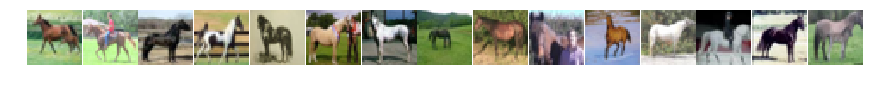

CLASS 8: ship


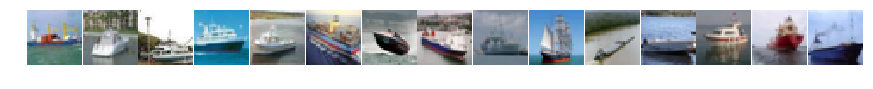

CLASS 9: truck


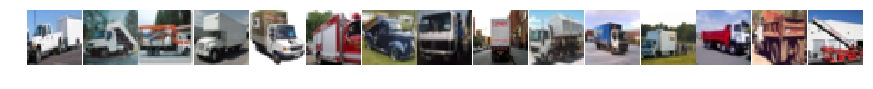

In [14]:
# show the first 15 samples of each catalog
for cid in range(n_classes):
    title = "CLASS {}: {}".format(cid, getSignName(cid))
    print(title)
    plotCatalog(X_train, y_train, cid, 15)
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

### I convert color image into YUV space and use all 3 channels as inputs
def normalizeImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    a = -0.5
    b = 0.5
    minimum = np.min(img)
    maximum = np.max(img)
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocessImages(images):
    results = []
    for img in images:
        results.append(normalizeImage(img))
    return results

X_train_p = preprocessImages(X_train)
X_valid_p = preprocessImages(X_valid)

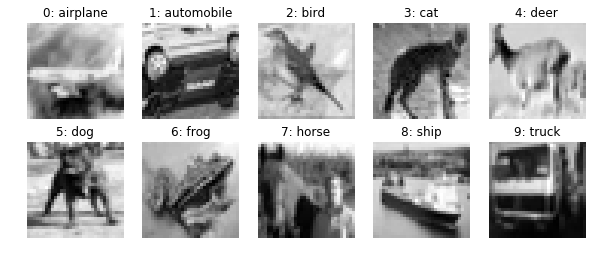

In [16]:
# show the gray channel of the preprocessed images
plotSamples(X_train_p, y_train, 5, channel = 0)

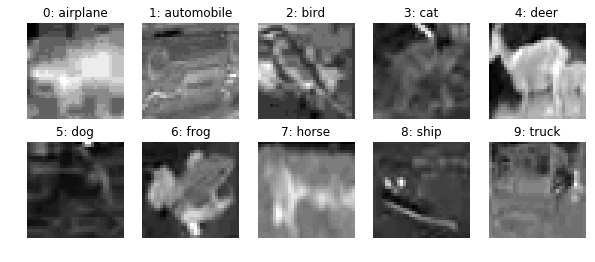

In [17]:
# show the U channel of the preprocessed images
plotSamples(X_train_p, y_train, 5, channel = 1)

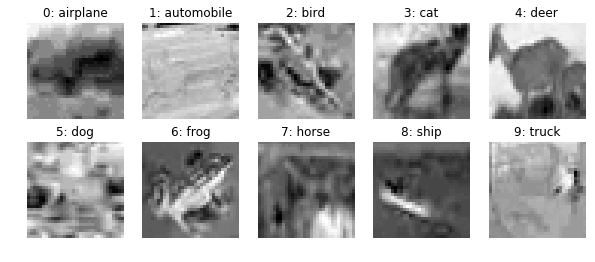

In [18]:
# show the V channel of the preprocessed images
plotSamples(X_train_p, y_train, 5, channel = 2)

### Model Architecture

In [19]:
### Here I just change depths of all hidden LeNet nodes into 3 times.

import tensorflow as tf

tf_ops = {}
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x18.
    w1 = tf.Variable(tf.truncated_normal((5, 5, 3, 18), mean = mu, stddev = sigma))
    b1 = tf.Variable(tf.zeros(18))
    strides = [1, 1, 1, 1]
    conv1 = tf.nn.conv2d(x, w1, strides, 'VALID') + b1
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    tf_ops["conv1"] = conv1
    
    # TODO: Pooling. Input = 28x28x18. Output = 14x14x48.
    pool1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    tf_ops["pool1"] = pool1
    
    # TODO: Layer 2: Convolutional. Output = 10x10x48.
    w2 = tf.Variable(tf.truncated_normal((5, 5, 18, 48), mean = mu, stddev = sigma))
    b2 = tf.Variable(tf.zeros(48))
    strides = [1, 1, 1, 1]
    conv2 = tf.nn.conv2d(pool1, w2, strides, 'VALID') + b2
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    tf_ops["conv2"] = conv2

    # TODO: Pooling. Input = 10x10x48. Output = 5x5x48.
    pool2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], 'VALID')
    tf_ops["pool2"] = pool2

    # TODO: Flatten. Input = 5x5x48. Output = 1200.
    fc1 = tf.contrib.layers.flatten(pool2)

    # TODO: Layer 3: Fully Connected. Input = 1200. Output = 360.
    w3 = tf.Variable(tf.truncated_normal((1200, 360), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(360))
    fc1 = tf.matmul(fc1, w3) + b3
  
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    tf_ops["fc1"] = fc1

    # TODO: Layer 4: Fully Connected. Input = 360. Output = 252.
    w4 = tf.Variable(tf.truncated_normal((360, 252), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(252))
    fc2 = tf.matmul(fc1, w4) + b4
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    tf_ops["fc2"] = fc2

    # TODO: Layer 5: Fully Connected. Input = 252. Output = 10.
    w5 = tf.Variable(tf.truncated_normal((252, n_classes), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, w5) + b5
    tf_ops["logits"] = logits
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### No important code changes in training and validation

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [21]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
### Start training. 
### It will restore the last training and contine to train if run the second time.

import os

EPOCHS = 40
BATCH_SIZE = 128

CONTINUOUS_TRAINING = True
SESSION_SAVE_FILE = './models/model_cifar10.ckpt'
os.makedirs('./models/', exist_ok=True)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_p)
    
    if CONTINUOUS_TRAINING and os.path.exists(SESSION_SAVE_FILE + ".index"):
        print("Load Trained Data ...")
        saver.restore(sess, SESSION_SAVE_FILE)
    else:
        print("Start Training ...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_p[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_p, y_valid)
        print("EPOCH {:>2}:  Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, SESSION_SAVE_FILE)
    print("Model saved")

Start Training ...

EPOCH  1:  Accuracy = 0.515
EPOCH  2:  Accuracy = 0.581
EPOCH  3:  Accuracy = 0.611
EPOCH  4:  Accuracy = 0.627
EPOCH  5:  Accuracy = 0.621
EPOCH  6:  Accuracy = 0.619
EPOCH  7:  Accuracy = 0.638
EPOCH  8:  Accuracy = 0.630
EPOCH  9:  Accuracy = 0.626
EPOCH 10:  Accuracy = 0.624
EPOCH 11:  Accuracy = 0.611
EPOCH 12:  Accuracy = 0.623
EPOCH 13:  Accuracy = 0.617
EPOCH 14:  Accuracy = 0.629
EPOCH 15:  Accuracy = 0.628
EPOCH 16:  Accuracy = 0.635
EPOCH 17:  Accuracy = 0.633
EPOCH 18:  Accuracy = 0.631
EPOCH 19:  Accuracy = 0.631
EPOCH 20:  Accuracy = 0.628
EPOCH 21:  Accuracy = 0.629
EPOCH 22:  Accuracy = 0.630
EPOCH 23:  Accuracy = 0.627
EPOCH 24:  Accuracy = 0.619
EPOCH 25:  Accuracy = 0.623
EPOCH 26:  Accuracy = 0.628
EPOCH 27:  Accuracy = 0.626
EPOCH 28:  Accuracy = 0.625
EPOCH 29:  Accuracy = 0.622
EPOCH 30:  Accuracy = 0.620
EPOCH 31:  Accuracy = 0.630
EPOCH 32:  Accuracy = 0.628
EPOCH 33:  Accuracy = 0.623
EPOCH 34:  Accuracy = 0.624
EPOCH 35:  Accuracy = 0.631


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

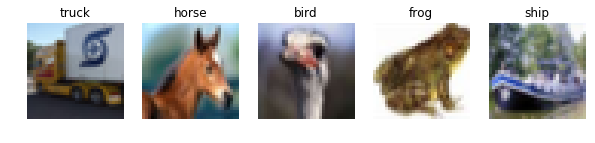

In [27]:
### I find five images from Google Map Street View
### There are Yield, No Left, Limit 40 miles, Stop, and Children Crossing signs
### Sign Yield, Stop, and Children Crossing are similar to original dataset.  It is expected to be OK in prediction.
### Sign No Left doesn't exist in the dataset.  It is expected to fail to prediction.
### There are sign Limit 30 miles and Limit 50 miles in dataset.  However, there 

import glob

N = 5
new_images = X_valid[:N]
new_labels = [getSignName(lbl) for lbl in y_valid[:N]]

i = 0
fig, ax = plt.subplots(1, N, figsize=(N * 2, 2))
for img, lbl in zip(new_images, new_labels):
    # print(file)
    plt.subplot(1, N, i + 1)
    plt.imshow(img)
    plt.title(lbl)
    plt.axis('off')
    i += 1
    

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

new_images_p = preprocessImages(new_images)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, SESSION_SAVE_FILE)
    predict = sess.run(tf.argmax(logits, 1), feed_dict={x: new_images_p})
    for cid, pid in zip(new_labels, predict):
        print("{:<11}: predicted as class {} - {}".format(cid, pid, getSignName(pid)))

truck      : predicted as class 9 - truck
horse      : predicted as class 2 - bird
bird       : predicted as class 2 - bird
frog       : predicted as class 6 - frog
ship       : predicted as class 1 - automobile


### Analyze Performance

The model predicted 3 out of 5 signs correctly, so it's <span style="color:red">60%</span> accurate on these new images.

Our training dataset has corresponding classes and similar images for YIELD, LIMIT40 and CHILD_CROSS signs.  They are correctly predicted.
However, there are no corresponding classes for NO_LEFT and LIMIT40, so they are not predicted correctly as expected.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

def printTopN(lbl, prob, N):
    print("SIGN {}:".format(lbl))
    clsids = (-prob).argsort()[:N]
    for cid in clsids:
        print("  [{:.2%}] class {}: {}".format(prob[cid], cid, getSignName(cid)))
    print()
    
preprocessed_images = preprocessImages(new_images)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, SESSION_SAVE_FILE)
    probs = sess.run(tf.nn.softmax(logits), feed_dict={x: new_images_p})
    
for lbl, prob in zip(new_labels, probs):
    printTopN(lbl, prob, 5)


SIGN truck:
  [100.00%] class 9: truck
  [0.00%] class 1: automobile
  [0.00%] class 0: airplane
  [0.00%] class 8: ship
  [0.00%] class 7: horse

SIGN horse:
  [56.62%] class 2: bird
  [31.95%] class 7: horse
  [9.33%] class 3: cat
  [1.79%] class 0: airplane
  [0.29%] class 5: dog

SIGN bird:
  [99.99%] class 2: bird
  [0.01%] class 7: horse
  [0.00%] class 3: cat
  [0.00%] class 5: dog
  [0.00%] class 4: deer

SIGN frog:
  [100.00%] class 6: frog
  [0.00%] class 7: horse
  [0.00%] class 2: bird
  [0.00%] class 3: cat
  [0.00%] class 4: deer

SIGN ship:
  [80.73%] class 1: automobile
  [10.25%] class 0: airplane
  [7.98%] class 9: truck
  [0.86%] class 8: ship
  [0.18%] class 6: frog



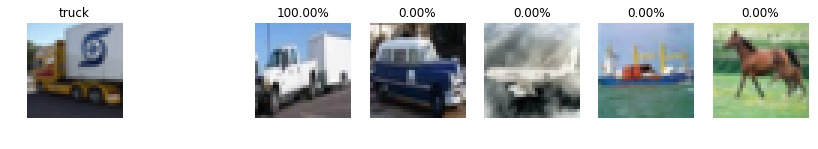

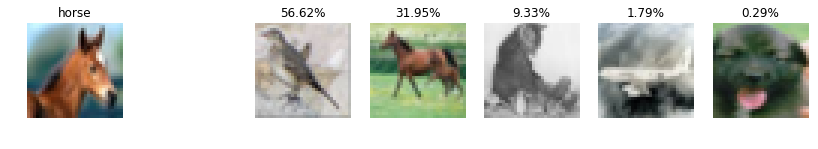

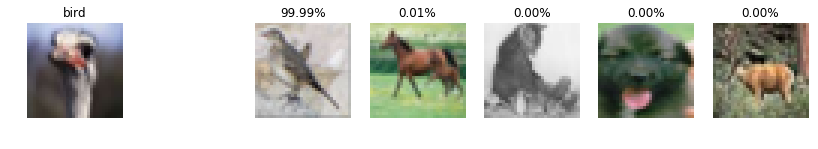

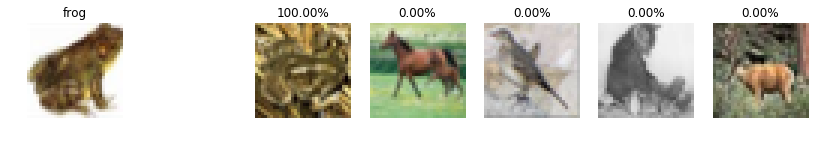

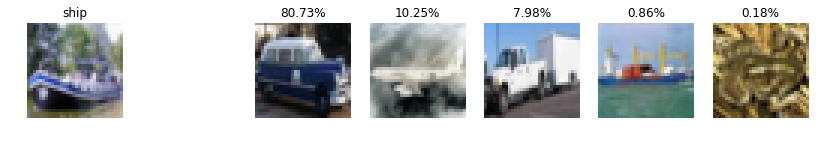

In [30]:
### We show the test image and top 5 predicted image for comparision
### It seems that sign LIMIT40 makes our model crazy.

def plotOneSample(classid):
    for img, imgId in zip(X_train, y_train):
        if imgId == classid:
            plt.imshow(img)
            break

def plotTopN(img, lbl, prob, N):
    clsids = (-prob).argsort()[:N]
    plt.subplots(1, N+2, figsize=((N + 2) * 2, 2))

    plt.subplot(1, N + 2, 1)
    plt.imshow(img)
    plt.title(lbl)
    plt.axis('off')
    
    plt.subplot(1, N + 2, 2)
    plt.axis('off')
    
    for i in range(N):
        plt.subplot(1, N+2, i+3)
        plotOneSample(clsids[i])
        plt.axis('off')
        plt.title("{:0.2%}".format(prob[clsids[i]]))
    

for img, lbl, prob in zip(new_images, new_labels, probs):
    plotTopN(img, lbl, prob, 5)
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [31]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

=== Original Image ===


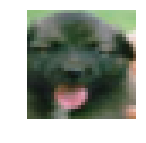

=== Visualize conv1 ===


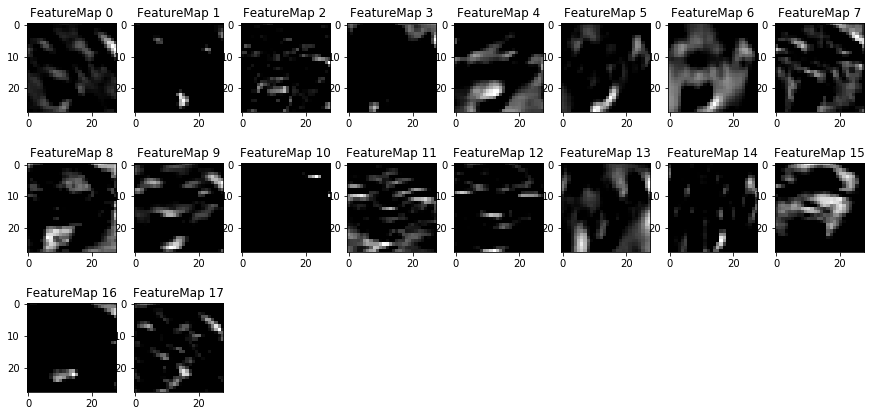

=== Visualize conv2 ===


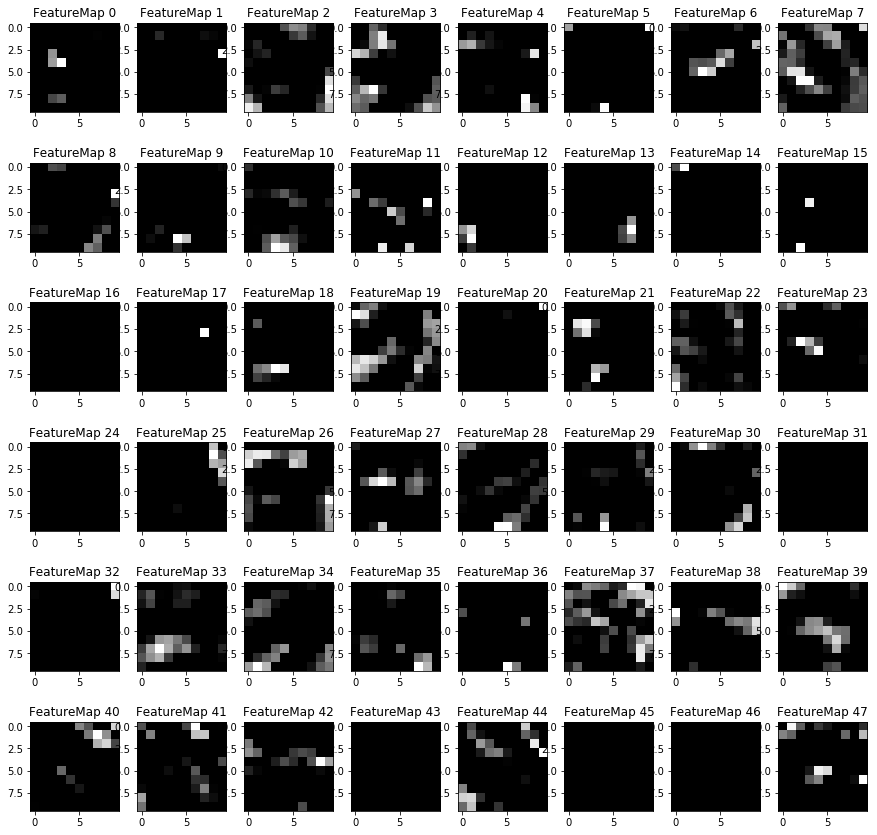

In [32]:
img = [X_train_p[0]]

print("=== Original Image ===")
plt.subplots(1, 1, figsize=(2, 2))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

vis_set = ["conv1", "conv2"]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, SESSION_SAVE_FILE)
    for name in vis_set: 
        print("=== Visualize {} ===".format(name))
        outputFeatureMap(sess, img, tf_ops[name], plt_num=16)
        plt.show()